In [3]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = '2023_01_sports'

# Initialize variables to keep track of the highest mean_test_score
max_mean_test_score = -float('inf')  # Start with a very low value
best_file = None  # To store the file with the best mean_test_score

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Process only CSV files
    if filename.endswith('.csv'):
        # Full path to the CSV file
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if the necessary columns exist in the DataFrame
        if 'rank_test_score' in df.columns and 'mean_test_score' in df.columns:
            # Filter the rows where rank_test_score is 1
            filtered_df = df[df['rank_test_score'] == 1]
            
            if not filtered_df.empty:
                # Extract the mean_test_score for rank_test_score == 1
                mean_test_score = filtered_df['mean_test_score'].iloc[0]
                
                # Compare with the current maximum
                if mean_test_score > max_mean_test_score:
                    max_mean_test_score = mean_test_score
                    best_file = filename  # Keep track of the file with the best score

# After processing all files, print the results
if best_file:
    print(f"The highest mean_test_score is {max_mean_test_score} from the file: {best_file}")
else:
    print("No row with rank_test_score == 1 found in any file.")


The highest mean_test_score is 0.537553052107493 from the file: 8_5_output.csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = '2023_01_sports'

# Initialize variables to keep track of the highest mean_test_score
max_mean_test_score = -float('inf')  # Start with a very low value
best_file = None  # To store the file with the best mean_test_score

data = {"n_neighbor":[], "n_component":[], "mean_fit_time": [], "mean_score_time": [], "mean_test_score": []}

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Process only CSV files
    if filename.endswith('.csv'):
        # Full path to the CSV file
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        filtered_df = df[
            (df['param_alpha'] == 1.0) &
            (df['param_cluster_selection_method'] == 'eom') &
            (df['param_min_cluster_size'] == 30) &
            (df['param_min_samples'] == 15)
        ]
        mean_fit_time_value = filtered_df['mean_fit_time'].values.item()
        mean_score_time = filtered_df['mean_score_time'].values.item()
        mean_test_score = filtered_df['mean_test_score'].values.item()

        file_names = file_path.split('/')[1]
        n_component = file_names.split("_")[0]
        n_neighbor = file_names.split("_")[1]
        data["n_neighbor"].append(n_neighbor)
        data["n_component"].append(n_component)
        data["mean_fit_time"].append(mean_fit_time_value)
        data["mean_score_time"].append(mean_score_time)
        data["mean_test_score"].append(mean_test_score)

df = pd.DataFrame(data)
df['n_component'] = pd.to_numeric(df['n_component'], errors='coerce')
df['n_neighbor'] = pd.to_numeric(df['n_neighbor'], errors='coerce')

             n_neighbor  mean_fit_time  mean_score_time  mean_test_score
n_component                                                             
4                  12.5       0.082104         0.102140         0.438978
8                  12.5       0.103024         0.101707         0.448938
16                 12.5       0.131022         0.118214         0.453481
24                 12.5       0.156260         0.122722         0.450304


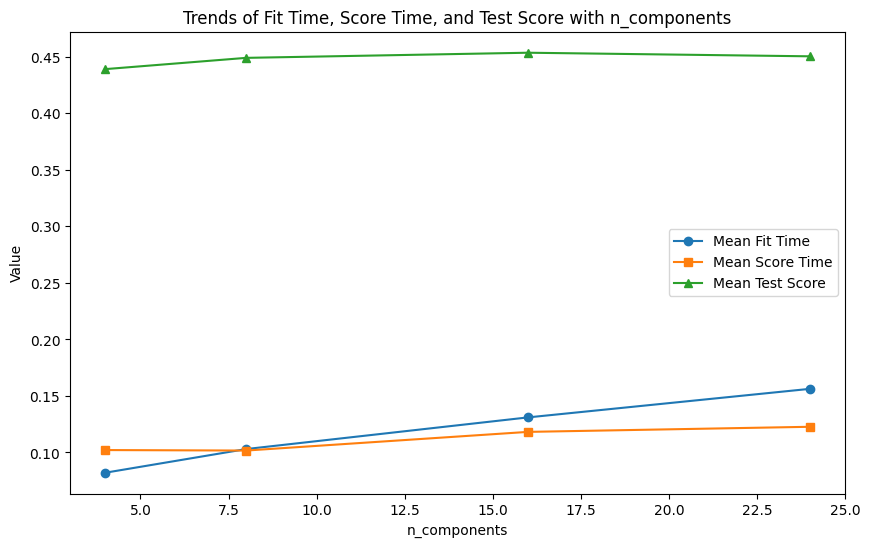

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# 按 n_components 分组并计算每个组的平均值
grouped = df.groupby('n_component').mean()
print(grouped)
# 绘制折线图
plt.figure(figsize=(10, 6))

# 绘制 mean_fit_time 的折线
plt.plot(grouped.index, grouped['mean_fit_time'], label='Mean Fit Time', marker='o')

# 绘制 mean_score_time 的折线
plt.plot(grouped.index, grouped['mean_score_time'], label='Mean Score Time', marker='s')

# 绘制 mean_test_score 的折线
plt.plot(grouped.index, grouped['mean_test_score'], label='Mean Test Score', marker='^')

# 设置标题和标签
plt.title('Trends of Fit Time, Score Time, and Test Score with n_components')
plt.xlabel('n_components')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()
